# **HEMA DARSHINI R - 22MIS0123**

In [1]:
!pip install qiskit
!pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 108.4 MB/s eta 0:00:00


In [2]:
# Deutsch–Jozsa Algorithm using Qiskit 2.x
# Compatible with Qiskit >= 2.0.0

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


In [3]:
# ---------- ORACLES ----------
def oracle_constant(qc, ancilla, value=0):
    """Constant oracle: f(x)=0 or f(x)=1"""
    if value == 1:
        qc.x(ancilla)


def oracle_balanced_parity(qc, inputs, ancilla):
    """Balanced oracle: f(x) = x0 XOR x1 XOR ... XOR xn"""
    for q in inputs:
        qc.cx(q, ancilla)




In [4]:
# ---------- DEUTSCH–JOZSA CIRCUIT ----------
def deutsch_jozsa_circuit(n, oracle_func, *oracle_args):
    """
    n: number of input qubits
    oracle_func: oracle function to modify the circuit
    oracle_args: extra arguments for oracle
    """
    qreg = QuantumRegister(n + 1, "q")
    creg = ClassicalRegister(n, "c")
    qc = QuantumCircuit(qreg, creg)

    inputs = list(range(n))
    ancilla = n

    # Step 1: Initialize |0...0>|1>
    qc.x(ancilla)

    # Step 2: Apply Hadamard to all qubits
    qc.h(qreg)

    # Step 3: Oracle
    oracle_func(qc, *oracle_args)

    # Step 4: Apply Hadamard to input qubits
    for q in inputs:
        qc.h(q)

    # Step 5: Measure only input qubits
    qc.measure(inputs, creg)

    return qc


In [5]:
# ---------- EXECUTION ----------
def run_dj(qc):
    """Run Deutsch–Jozsa circuit on AerSimulator"""
    simulator = AerSimulator()
    tqc = transpile(qc, simulator)
    job = simulator.run(tqc, shots=1024)
    result = job.result()
    counts = result.get_counts()

    print("Measurement counts:", counts)
    plot_histogram(counts)
    plt.show()

    n = qc.num_clbits
    if counts.get("0" * n, 0) == 1024:
        print("✅ Function is CONSTANT")
    else:
        print("✅ Function is BALANCED")


In [6]:
# ---------- MAIN ----------
if __name__ == "__main__":
    n = 3  # number of input qubits

    print("\n=== Constant Oracle (f(x)=0) ===")
    qc_const = deutsch_jozsa_circuit(
        n, oracle_constant, n, 0
    )
    print(qc_const.draw(fold=-1))
    run_dj(qc_const)

    print("\n=== Balanced Oracle (Parity) ===")
    qc_balanced = deutsch_jozsa_circuit(
        n, oracle_balanced_parity, list(range(n)), n
    )
    print(qc_balanced.draw(fold=-1))
    run_dj(qc_balanced)



=== Constant Oracle (f(x)=0) ===
     ┌───┐┌───┐┌─┐      
q_0: ┤ H ├┤ H ├┤M├──────
     ├───┤├───┤└╥┘┌─┐   
q_1: ┤ H ├┤ H ├─╫─┤M├───
     ├───┤├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├─╫──╫─┤M├
     ├───┤├───┤ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─╫──╫──╫─
     └───┘└───┘ ║  ║  ║ 
c: 3/═══════════╩══╩══╩═
                0  1  2 
Measurement counts: {'000': 1024}
✅ Function is CONSTANT

=== Balanced Oracle (Parity) ===
     ┌───┐          ┌───┐     ┌─┐           
q_0: ┤ H ├───────■──┤ H ├─────┤M├───────────
     ├───┤       │  └───┘┌───┐└╥┘     ┌─┐   
q_1: ┤ H ├───────┼────■──┤ H ├─╫──────┤M├───
     ├───┤       │    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_2: ┤ H ├───────┼────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_3: ┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘└───┘└───┘ ║       ║  ║ 
c: 3/══════════════════════════╩═══════╩══╩═
                               0       1  2 
Measurement counts: {'111': 1024}
✅ Function is BALANCED


# **Task 1 — Modify the Oracle (balanced oracle that flips ancilla for exactly half the inputs)**

In [7]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import MCXGate

def balanced_oracle(qc: QuantumCircuit, input_qubits: list, ancilla):

    # Simple efficient balanced oracle: flip ancilla when MSB == 1
    msb = input_qubits[0]  # choose qubit-0 as MSB
    qc.cx(msb, ancilla)


def general_balanced_oracle(qc: QuantumCircuit, input_qubits: list, ancilla, selected_indices=None):

    n = len(input_qubits)
    total = 1 << n
    if selected_indices is None:
        # choose half: indices with MSB=1 (i.e., values in [2^(n-1), 2^n - 1])
        selected_indices = list(range(1 << (n-1), total))
    assert len(selected_indices) * 2 == total, "selected_indices must be exactly half of all inputs"

    # For each target pattern, make controls by Xing qubits that should be 0,
    # apply MCX, then undo the Xs.
    for idx in selected_indices:
        bits = [(idx >> (n - 1 - i)) & 1 for i in range(n)]  # MSB-first
        # Apply X to input qubits where bit == 0 so we control on 1
        zeros = [q for bit, q in zip(bits, input_qubits) if bit == 0]
        for q in zeros:
            qc.x(q)
        # Multi-controlled-X (controls=input_qubits, target=ancilla)
        # Use ancilla-free MCX for small n; for larger n consider using ancilla qubits.
        mcx = MCXGate(len(input_qubits))
        qc.append(mcx, input_qubits + [ancilla])
        # Undo Xs
        for q in zeros:
            qc.x(q)


# **Task 2 — Change the Number of Input Qubits (n=2,4,5) and inspect depth/output**

In [10]:
# ✅ Step 1: Install dependencies
!pip install qiskit qiskit-aer --quiet

# ✅ Step 2: Imports
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# ✅ Step 3: Balanced oracle (MSB-based)
def balanced_oracle(qc: QuantumCircuit, input_qubits: list, ancilla):
    """
    Simple balanced oracle:
    Flips the ancilla when the most significant bit (MSB) is 1.
    """
    msb = input_qubits[0]
    qc.cx(msb, ancilla)

# ✅ Step 4: Deutsch–Jozsa circuit builder
def deutsch_jozsa_circuit(n, oracle_fn):
    qc = QuantumCircuit(n + 1, n)
    inputs = list(range(n))
    ancilla = n

    # Initialize ancilla to |1>
    qc.x(ancilla)
    qc.h(ancilla)

    # Apply Hadamard to inputs
    for q in inputs:
        qc.h(q)

    # Apply oracle
    oracle_fn(qc, inputs, ancilla)

    # Apply Hadamard again to inputs
    for q in inputs:
        qc.h(q)

    # Measure inputs
    qc.measure(inputs, range(n))

    return qc

# ✅ Step 5: Run for n = 2, 4, 5
backend = Aer.get_backend("aer_simulator")

for n in [2, 4, 5]:
    print(f"\n--- Deutsch–Jozsa with n = {n} ---")
    qc = deutsch_jozsa_circuit(n, balanced_oracle)

    # Show circuit details
    print(f"Depth: {qc.depth()}")
    print("Gate counts:", qc.count_ops())

    # Transpile and run
    tqc = transpile(qc, backend)
    job = backend.run(tqc, shots=1024)
    result = job.result()
    counts = result.get_counts()

    # Display results
    print("Measurement outcomes:", counts)
    try:
        plot_histogram(counts)
    except Exception as e:
        print("Histogram plot skipped:", e)



--- Deutsch–Jozsa with n = 2 ---
Depth: 5
Gate counts: OrderedDict({'h': 5, 'measure': 2, 'x': 1, 'cx': 1})
Measurement outcomes: {'01': 1024}

--- Deutsch–Jozsa with n = 4 ---
Depth: 5
Gate counts: OrderedDict({'h': 9, 'measure': 4, 'x': 1, 'cx': 1})
Measurement outcomes: {'0001': 1024}

--- Deutsch–Jozsa with n = 5 ---
Depth: 5
Gate counts: OrderedDict({'h': 11, 'measure': 5, 'x': 1, 'cx': 1})
Measurement outcomes: {'00001': 1024}


# **Task 3 — Add Noise Simulation**

In [12]:
# ✅ Step 1: Install dependencies
!pip install qiskit qiskit-aer --quiet

# ✅ Step 2: Imports
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit_aer.noise import NoiseModel
from qiskit_aer.noise.errors import depolarizing_error, ReadoutError

# ✅ Step 3: Define simple noise model
def make_simple_noise_model():
    """
    Creates a simple noise model:
    - small depolarizing errors on 1-qubit and 2-qubit gates
    - small readout errors
    """
    noise_model = NoiseModel()

    # 1-qubit depolarizing error (0.5%)
    one_q_error = depolarizing_error(0.005, 1)

    # 2-qubit depolarizing error (2%)
    two_q_error = depolarizing_error(0.02, 2)

    # Apply the correct error to each gate type
    noise_model.add_all_qubit_quantum_error(one_q_error, ['h', 'x', 'ry', 'rz'])
    noise_model.add_all_qubit_quantum_error(two_q_error, ['cx'])

    # Add measurement (readout) error
    readout_error = ReadoutError([[0.98, 0.02], [0.03, 0.97]])
    noise_model.add_all_qubit_readout_error(readout_error)

    return noise_model

# ✅ Step 4: Build Deutsch–Jozsa circuit (reuse from before)
def balanced_oracle(qc: QuantumCircuit, input_qubits: list, ancilla):
    msb = input_qubits[0]
    qc.cx(msb, ancilla)

def deutsch_jozsa_circuit(n, oracle_fn):
    qc = QuantumCircuit(n + 1, n)
    inputs = list(range(n))
    ancilla = n
    qc.x(ancilla)
    qc.h(ancilla)
    for q in inputs:
        qc.h(q)
    oracle_fn(qc, inputs, ancilla)
    for q in inputs:
        qc.h(q)
    qc.measure(inputs, range(n))
    return qc

# ✅ Step 5: Simulate with and without noise
backend = Aer.get_backend('aer_simulator')
noise_model = make_simple_noise_model()

n = 3
qc = deutsch_jozsa_circuit(n, balanced_oracle)

# With noise
t_qc = transpile(qc, backend)
job_noisy = backend.run(t_qc, shots=4096, noise_model=noise_model)
res_noisy = job_noisy.result()
counts_noisy = res_noisy.get_counts()

# Ideal (no noise)
job_ideal = backend.run(t_qc, shots=4096)
res_ideal = job_ideal.result()
counts_ideal = res_ideal.get_counts()

print("\n✅ Ideal results:", counts_ideal)
print("\n⚙️  Noisy results:", counts_noisy)



✅ Ideal results: {'001': 4096}

⚙️  Noisy results: {'100': 2, '110': 1, '111': 1, '011': 80, '000': 177, '010': 5, '101': 79, '001': 3751}


# **Task 4 — Run on IBM Quantum Device (using qiskit_ibm_runtime)**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.4/377.4 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.4 MB/s eta 0:00:00

🧩 Oracle Type: CONSTANT
Measurement Counts: {'00': 1024}


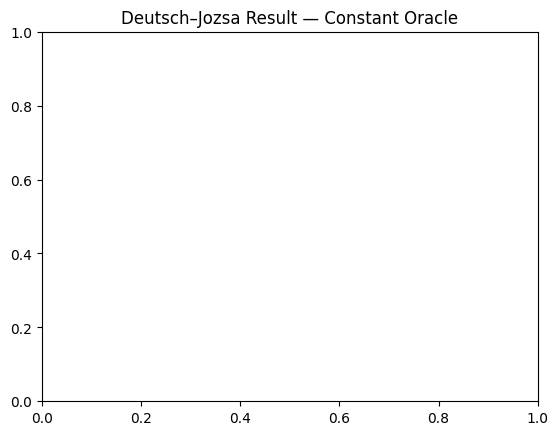


🧩 Oracle Type: BALANCED
Measurement Counts: {'11': 1024}


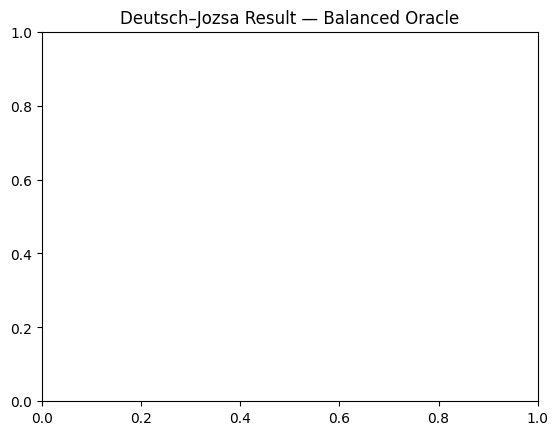

In [14]:
# ✅ Step 1: Install dependencies (only first run)
!pip install qiskit qiskit-aer qiskit-ibm-runtime --quiet

# ✅ Step 2: Imports
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Session
import matplotlib.pyplot as plt


# ✅ Step 3: Oracle Creation
def deutsch_jozsa_oracle(case: str) -> QuantumCircuit:

    oracle = QuantumCircuit(3)

    if case == 'balanced':
        # Example balanced function: f(x) = x1 XOR x2
        oracle.cx(0, 2)
        oracle.cx(1, 2)
    elif case == 'constant':
        # Example constant function: f(x) = 1 (can remove X for always 0)
        oracle.x(2)
    else:
        raise ValueError("case must be 'balanced' or 'constant'")

    return oracle


# ✅ Step 4: Deutsch–Jozsa Algorithm Circuit
def deutsch_jozsa_algorithm(case: str):
    qc = QuantumCircuit(3, 2)

    # Step 1: Initialize last qubit to |1⟩
    qc.x(2)
    qc.barrier()

    # Step 2: Apply Hadamard to all qubits
    qc.h(range(3))
    qc.barrier()

    # Step 3: Apply oracle
    qc.compose(deutsch_jozsa_oracle(case), inplace=True)
    qc.barrier()

    # Step 4: Apply Hadamard to first 2 qubits
    qc.h([0, 1])
    qc.barrier()

    # Step 5: Measure first 2 qubits
    qc.measure([0, 1], [0, 1])

    return qc


# ✅ Step 5: Run on Simulator (no IBM account needed)
sim = AerSimulator()

for case in ['constant', 'balanced']:
    qc = deutsch_jozsa_algorithm(case)
    tqc = transpile(qc, sim)
    result = sim.run(tqc, shots=1024).result()
    counts = result.get_counts()

    print(f"\n🧩 Oracle Type: {case.upper()}")
    print("Measurement Counts:", counts)
    plot_histogram(counts)
    plt.title(f"Deutsch–Jozsa Result — {case.capitalize()} Oracle")
    plt.show()





# **Task 5 — Circuit (oracle) Unitary and Explanation**

In [15]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
import numpy as np

# Build a small circuit that contains *only* the oracle for n=2
n = 2
qc_oracle = QuantumCircuit(n + 1)  # inputs + ancilla
inputs = list(range(n))
ancilla = n

# Use the simple balanced oracle (MSB flips ancilla)
balanced_oracle(qc_oracle, inputs, ancilla)

# Turn oracle circuit into a Gate so it can be inspected
oracle_gate = qc_oracle.to_gate(label="Oracle")

# Print definition (decomposed gate sequence)
print("Oracle gate definition:")
print(oracle_gate.definition)

# Get the unitary matrix (Operator)
U = Operator(oracle_gate)
print("Oracle unitary matrix (shape):", U.data.shape)
np.set_printoptions(precision=3, suppress=True)
print(U.data)

# Explanation:
# - The matrix acts on n+1 qubits. If ancilla is in |y>, and input is |x>, the oracle maps:
#     |x>|y> -> |x>|y XOR f(x)>
#   where f(x) = MSB(x) in the simple oracle.
# - Thus rows/columns show permutation-with-phase that flips ancilla basis for those x where MSB=1.


Oracle gate definition:
          
q_0: ──■──
       │  
q_1: ──┼──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘
Oracle unitary matrix (shape): (8, 8)
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]
